In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generateExamples(num=1000):
    W = [1.0,-3.0]
    b = 1.0

    W = np.reshape(W,(2,1))
    X = np.random.randn(num,2)
    
    y = b + np.dot(X,W) + np.random.randn()
    
    y = np.reshape(y,(num,1))
    
    return X,y


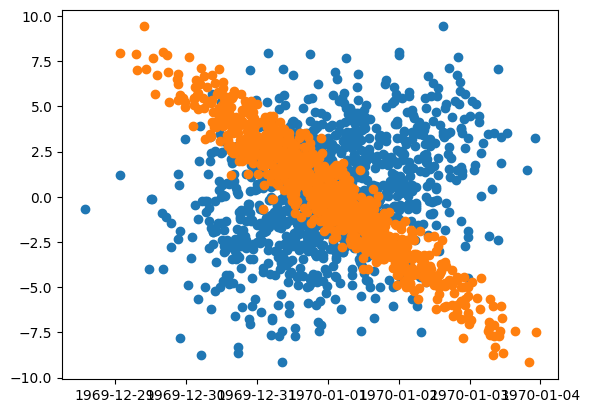

In [3]:
X,y = generateExamples()

plt.plot_date(X,y)

In [4]:
class Model:
    def __init__(self,num_features,learning_rate = 0.005,max_iteration=50):
        self.num_features = num_features
        self.W = np.random.rand(num_features,1)
        self.b = np.random.randn()
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        
    def _forward(self,X):
        y = self.b + np.dot(X,self.W)
        return y
    
    def _loss(self,predicted,actual):
        return np.sum(np.square(predicted - actual )) / (2*predicted.shape[0])
    
    def _backward(self,X,predicted,actual):
        m = actual.shape[0]
        db = (1/m) * np.sum(predicted - actual)
        dW = (1/m) *np.sum(np.dot(np.transpose(predicted - actual),X),axis=0)
        return dW,db
    
    def _updateParams(self,dW,db):
        self.W = self.W - self.learning_rate * np.reshape(dW,(self.num_features,1))
        self.b = self.b - db
        
    def train(self,x_train,y_train):
        losses = []
         
        for i in range(self.max_iteration):
            y_hat = self._forward(x_train)
            loss = self._loss(y_hat, y_train)
            dW,db = self._backward(x_train, y_hat, y_train)
            self._updateParams(dW, db)
            losses.append(loss)
            if i%int(self.max_iteration/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i,loss))
        return losses
            
        
        
        
        

Iter: 0, Loss: 6.8465
Iter: 1000, Loss: 0.0004
Iter: 2000, Loss: 0.0000
Iter: 3000, Loss: 0.0000
Iter: 4000, Loss: 0.0000
Iter: 5000, Loss: 0.0000
Iter: 6000, Loss: 0.0000
Iter: 7000, Loss: 0.0000
Iter: 8000, Loss: 0.0000
Iter: 9000, Loss: 0.0000


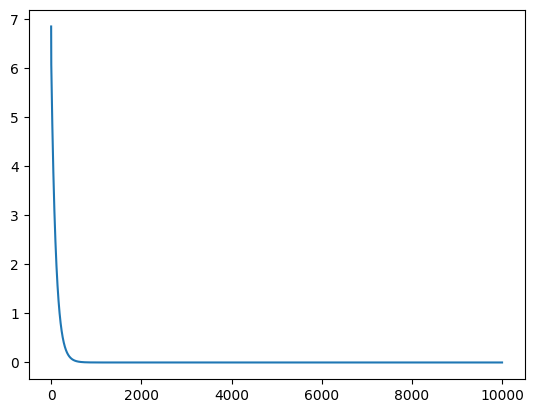

In [5]:
x_train,y_train = generateExamples()

model = Model(2,max_iteration=10000)
losses = model.train(x_train, y_train)
plt.plot(losses)